In [2]:
%matplotlib inline

In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [4]:
from sklearn.metrics import f1_score

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#### Helper functions

In [ ]:
def show_scoring_results(clasification_type, model):
    print(f"{clasification_type} train Accuracy: {model.score(diamonds_features_train, diamonds_labelss_train)}")
    print(f"{clasification_type} test Accuracy: {model.score(diamonds_features_test, diamonds_labelss_test)}")
    print(f"{clasification_type} F1 weighted train score: {f1_score(diamonds_labelss_train, model.predict(diamonds_features_train), average = 'weighted')}")
    print(f"{clasification_type} F1 weighted test score: {f1_score(diamonds_labelss_test, model.predict(diamonds_features_test), average = 'weighted')}")                         

# Read Data

In [5]:
diamonds_data = pd.read_csv("data/diamonds.csv")
diamonds_data.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [6]:
diamonds_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


In [7]:
diamonds_data = diamonds_data.drop("Unnamed: 0", axis = 1)

In [8]:
diamonds_data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [9]:
diamonds_data.shape

(53940, 10)

In [10]:
diamonds_data.loc[(diamonds_data["x"]==0) | (diamonds_data["y"]==0) | (diamonds_data["z"]==0)].shape

(20, 10)

In [11]:
diamonds_data = diamonds_data[(diamonds_data[["x","y","z"]] != 0).all(axis =1)]
diamonds_data.shape

(53920, 10)

In [12]:
diamonds_data.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028259,0.181646,0.921592,0.977779,0.953991,0.961048
depth,0.028259,1.000000,-0.295733,-0.010729,-0.025017,-0.029069,0.095023
table,0.181646,-0.295733,1.000000,0.127245,0.196097,0.184493,0.152483
price,0.921592,-0.010729,0.127245,1.000000,0.887231,0.867864,0.868206
x,0.977779,-0.025017,0.196097,0.887231,1.000000,0.974918,0.975435
y,0.953991,-0.029069,0.184493,0.867864,0.974918,1.000000,0.956744
z,0.961048,0.095023,0.152483,0.868206,0.975435,0.956744,1.000000


In [13]:
cut_dict = {
    'Fair' : 0,
    'Very Good' : 1,
    'Good' : 2,
    'Premium' : 3,
    'Ideal' : 4
}
colors = diamonds_data["cut"].replace(cut_dict)

In [14]:
colors.shape

(53920,)

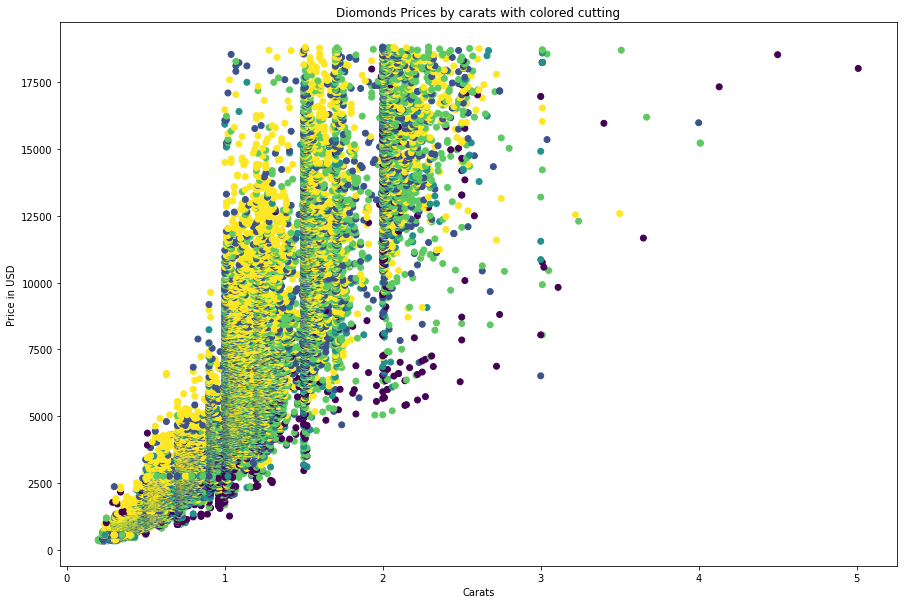

In [15]:
plt.figure(figsize=(15,10))
plt.scatter(diamonds_data["carat"], diamonds_data["price"], c = colors)
plt.xlabel("Carats")
plt.ylabel("Price in USD")
plt.title("Diomonds Prices by carats with colored cutting")
plt.show()

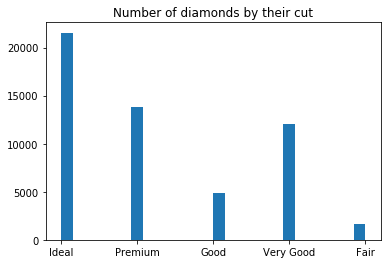

In [16]:
plt.hist(diamonds_data["cut"], bins = "fd")
plt.title("Number of diamonds by their cut")
plt.show()

## Features

In [17]:
diamonds_labels = colors.astype("int64")
diamonds_features = diamonds_data.drop("cut", axis = 1)

In [18]:
print(diamonds_labels.shape)
print(diamonds_features.shape)

(53920,)
(53920, 9)


In [19]:
diamonds_features.head()

,carat,color,clarity,depth,table,price,x,y,z
0,0.23,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Convert categorial columns to dummies

In [20]:
diamonds_features = pd.get_dummies(diamonds_features)
diamonds_features.shape

(53920, 22)

In [21]:
diamonds_features.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,0,0,...,0,1,0,0,0,1,0,0,0,0


### Normalize data

In [22]:
scale = StandardScaler()
diamonds_features[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']] = scale.fit_transform(diamonds_features[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']])
diamonds_features.head()

,carat,depth,table,price,x,y,z,color_D,color_E,color_F,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.198204,-0.174203,-1.099725,-0.904132,-1.591573,-1.539219,-1.580084,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,-1.240417,-1.361090,1.585988,-0.904132,-1.645173,-1.662014,-1.750896,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,-1.198204,-3.385781,3.376463,-0.903881,-1.502241,-1.460280,-1.750896,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,-1.071566,0.454149,0.243131,-0.902125,-1.368242,-1.319943,-1.295396,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,-1.029353,1.082501,0.243131,-0.901875,-1.243176,-1.214690,-1.124583,0,0,0,...,0,1,0,0,0,1,0,0,0,0


In [23]:
diamonds_features[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']].describe().T

,count,mean,std,min,25%,50%,75%,max
carat,53920.0,-2.289977e-14,1.000009,-1.261523,-0.839396,-0.206205,0.511411,8.890635
depth,53920.0,-2.795830e-15,1.000009,-13.090331,-0.523288,0.035248,0.523966,12.043756
table,53920.0,1.116263e-14,1.000009,-6.471152,-0.652106,-0.204488,0.690750,16.805029
price,53920.0,-4.567901e-15,1.000009,-0.904132,-0.747883,-0.383722,0.349178,3.734913
x,53920.0,1.150167e-15,1.000009,-1.788105,-0.912646,-0.028253,0.722141,4.474109
y,53920.0,-3.277413e-15,1.000009,-1.802350,-0.890162,-0.021829,0.706168,46.631351
z,53920.0,2.775953e-15,1.000009,-3.515961,-0.896833,-0.014300,0.711654,40.226327


### Split data to test and train sets


In [25]:
diamonds_features_train, diamonds_features_test,diamonds_labelss_train,diamonds_labelss_test = train_test_split(
    diamonds_features,
    diamonds_labels,
    train_size = 0.8,
    stratify = diamonds_labels)
diamonds_features_train.shape, diamonds_features_test.shape, diamonds_labelss_train.shape,diamonds_labelss_test.shape

((43136, 22), (10784, 22), (43136,), (10784,))

### Prepare the cross-validation fold

In [27]:
k_fold = StratifiedKFold(n_splits = 5)

# Perform different classification approaches to data set

## Logistic regression

In [53]:
parameters = {
    "C": [1e-3,0.001,0.1,10, 100, 1000]
}
logistic_model = LogisticRegression()
grid_search = GridSearchCV(logistic_model, param_grid = parameters, scoring = "f1_weighted", cv = k_fold)
grid_search.fit(diamonds_features_train, diamonds_labelss_train)
print("Logistic regression, best params", grid_search.best_params_)
print("Logistic regression; best score:", grid_search.best_score_)

Logistic regression, best params {'C': 1000}
Logistic regression; best score: 0.6297618508269847


In [54]:
show_scoring_results("Logistic Regression", grid_search)

Logistic Regression train Accuracy: 0.6301411620172507
Logistic Regression test Accuracy: 0.6328425702120275
Logistic Regression F1 weighted train score: 0.6301411620172507
Logistic Regression F1 weighted test score: 0.6328425702120275
